### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [3]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [4]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

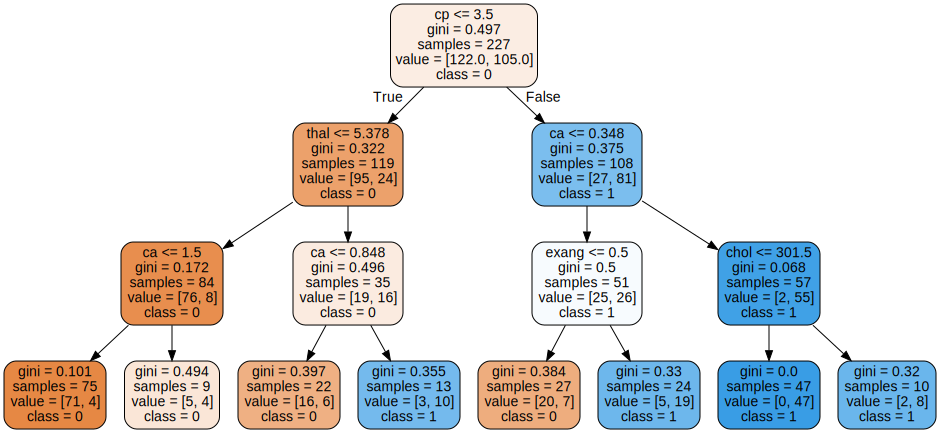

In [5]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

1.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# load data
data = pd.read_csv("heart_disease.csv", na_values="?")

# split X and y
y = data["label"]
X = data.drop("label", axis=1)

# train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


2.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__criterion": ["gini", "entropy"]
}

dt_grid = GridSearchCV(
    dt_pipe,
    dt_param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [None, 5, 10, 20],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

3.

Bagged Decision Trees
Hyperparameters ที่เลือกศึกษา

Number of trees – จำนวนต้นไม้ใน ensemble

Fraction of samples per tree – สัดส่วนข้อมูลที่สุ่มให้แต่ละต้น

Depth of base decision tree – ควบคุม overfitting ของแต่ละต้น

In [8]:
from sklearn.ensemble import BaggingClassifier

bag_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

bag_param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__max_samples": [0.6, 0.8, 1.0],
    "model__estimator__max_depth": [None, 5, 10]
}

bag_grid = GridSearchCV(
    bag_pipe,
    bag_param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

bag_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                          random_state=42))]),
             n_jobs=-1,
             param_grid={'model__estimator__max_depth': [None, 5, 10],
                         'model__max_samples': [0.6, 0.8, 1.0],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1_macro')

4) Random Forest
Hyperparameters ที่เลือกศึกษา

Number of trees – เพิ่มความเสถียรของโมเดล

Tree depth – ควบคุมความซับซ้อน

Number of features per split – เพิ่มความหลากหลายของต้นไม้

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 5, 10],
    "model__max_features": ["sqrt", "log2"]
}

rf_grid = GridSearchCV(
    rf_pipe,
    rf_param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__n_estimators': [100, 200]},
             scoring='f1_macro')

Evaluation on Test Set

In [10]:
from sklearn.metrics import f1_score, accuracy_score

models = {
    "Decision Tree": dt_grid.best_estimator_,
    "Bagged Trees": bag_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name)
    print("  F1_macro :", f1_score(y_test, y_pred, average="macro"))
    print("  Accuracy :", accuracy_score(y_test, y_pred))


Decision Tree
  F1_macro : 0.7042025862068966
  Accuracy : 0.7049180327868853
Bagged Trees
  F1_macro : 0.8360215053763441
  Accuracy : 0.8360655737704918
Random Forest
  F1_macro : 0.8851224105461393
  Accuracy : 0.8852459016393442


Best model

Random Forest เป็นโมเดลที่ดีที่สุด เนื่องจากให้ค่า f1_macro และ accuracy สูงที่สุดบน test set
เพราะใช้การรวมผลจากหลาย decision trees ทำให้ลด overfitting และเพิ่มความเสถียรของการทำนาย

Plot the best tree model 🌳

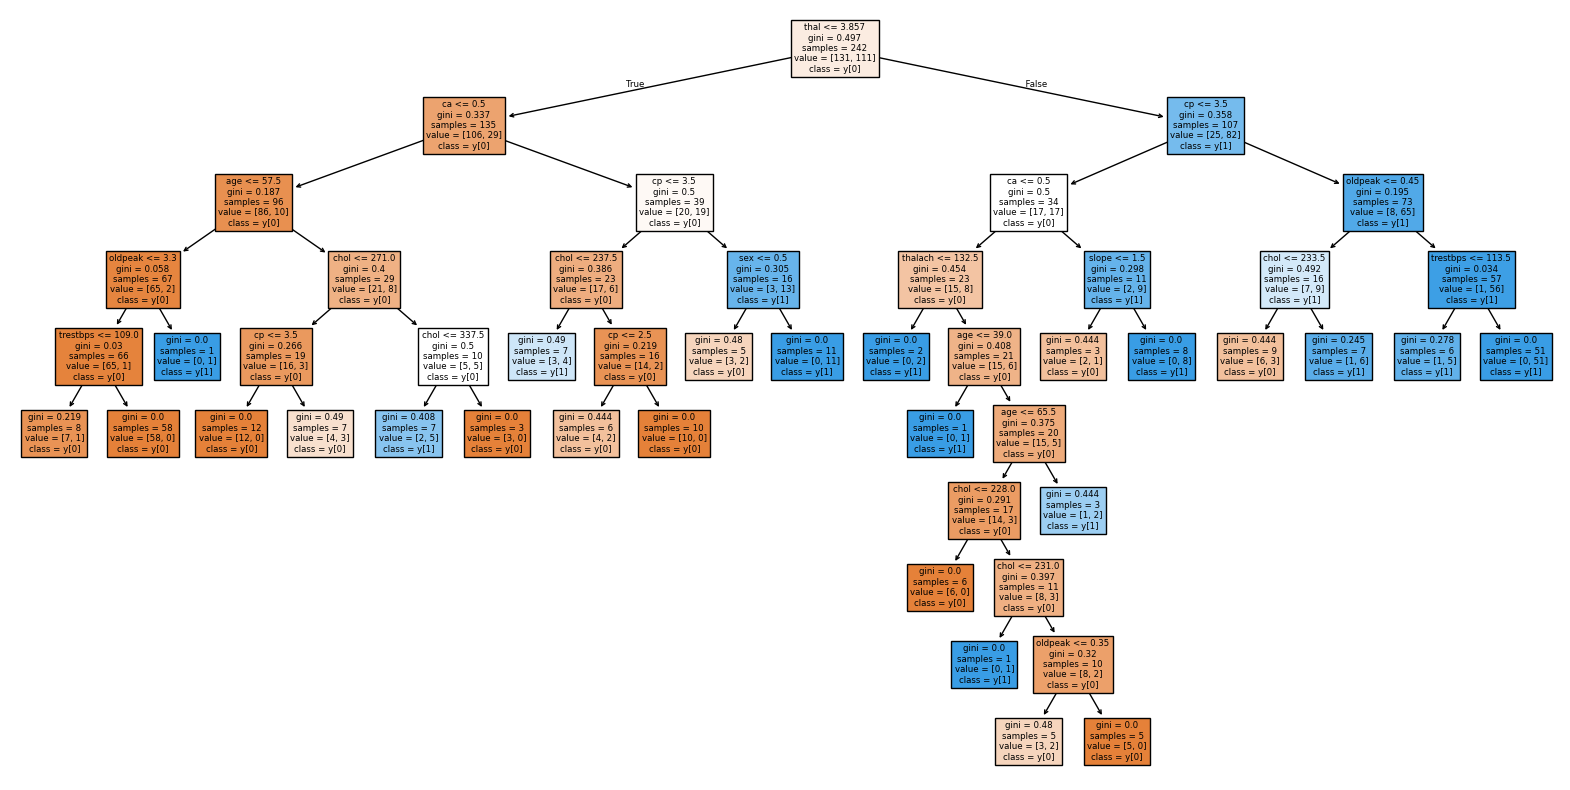

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_grid.best_estimator_.named_steps["model"],
    filled=True,
    feature_names=X.columns,
    class_names=True
)
plt.show()


Hyperparameters ที่เลือก

Tree depth: จำกัดความลึกของต้นไม้เพื่อป้องกัน overfitting

Minimum samples to split: ป้องกันการแตกกิ่งจากข้อมูลจำนวนน้อย

Split criterion: วิธีประเมินความบริสุทธิ์ของโหนด

Number of trees: เพิ่มความแม่นยำและความเสถียรของ ensemble

Fraction of samples per tree: เพิ่มความหลากหลายของแต่ละต้นไม้

Number of features per split: ลดความสัมพันธ์ระหว่างต้นไม้ใน forest

Best values of hyperparameters

In [12]:
dt_grid.best_params_
bag_grid.best_params_
rf_grid.best_params_


{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__n_estimators': 100}

Decision Tree: ความลึกของต้นไม้ระดับปานกลาง และใช้ entropy เป็นเกณฑ์การแบ่ง

Bagged Trees: ใช้จำนวนต้นไม้สูง และสุ่มข้อมูลบางส่วนให้แต่ละต้น

Random Forest: ใช้จำนวนต้นไม้มาก และสุ่ม feature ในแต่ละ split